In [1]:
from IPython.display import Image, display

from dotenv import load_dotenv, find_dotenv

# Load the API keys from .env
load_dotenv(find_dotenv(), override=True)

True

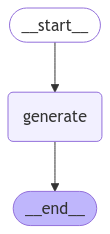

In [2]:
from src.agent import get_graph

graph = get_graph()
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
from langchain_core.messages import HumanMessage

inputs = {"messages": [HumanMessage(content="what is the weather in sf")]}
response = graph.stream(inputs, stream_mode="messages")
response

<generator object Pregel.stream at 0x000002226437F3E0>

In [23]:
from typing import Generator
def stream_values(response) -> Generator[str, None, None]:
    for msg, metadata in response:
        if (
            msg.content
            and not isinstance(msg, HumanMessage)
            and metadata["langgraph_node"] == "generate"
        ):
            # print(msg.content, end="|", flush=True)
            # print(msg.content, end="", flush=True)
            yield msg.content
print(stream_values(response), end="", flush=True)

<generator object stream_values at 0x000002226439AF80>